# Задание

- Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)<br>
- Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety<br>
- Разделите данные на выборку для обучения и тестирования<br>
- Постройте модель LDA<br>
- Визуализируйте предсказания для тестовой выборки и центры классов<br>
- Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width<br>
- Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
# загружаем данные
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [7]:
# смотрим, как выглядят
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# смотрим, как выглядит целевая переменная
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
# оставляем только признаки sepal_length и sepal_width
data_short = data[['sepal length (cm)', 'sepal width (cm)']]
data_short.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [22]:
# разбиваем выборку на две части, тестовую и тренировочную
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_short, data_class, test_size=0.25)

In [23]:
# импорт LDA-функционала
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
lda = LinearDiscriminantAnalysis()

In [25]:
# обучение данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [28]:
# прогноз на тестовой выборке
y_prog = lda.predict(X_test)

In [18]:
# разница факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,2,2
2,0,0
3,1,1
4,0,0
5,2,2
6,1,1
7,1,1
8,0,0
9,2,2


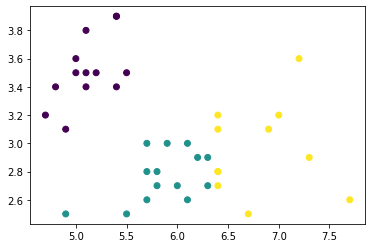

In [29]:
# визуализируем предсказания для тестовой выборки
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_prog)
plt.show()

In [30]:
# найдем центры классов
lda.means_

array([[4.96486486, 3.3972973 ],
       [5.89230769, 2.73846154],
       [6.65555556, 3.03333333]])

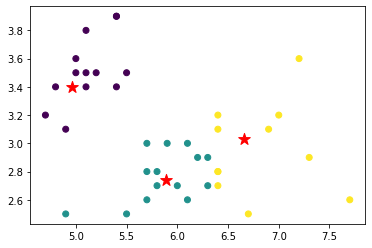

In [31]:
# добавляем центроиды
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_prog)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [41]:
# размерность данных одинаковая, но ширина всегда меньше длины. Приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
data_short_scaled = scaler.fit_transform(data_short)

In [32]:
from sklearn.cluster import KMeans

In [44]:
# попробуем определить оптимальное число кластеров по графику локтя
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_short_scaled)
    k_inertia.append(clf_kmeans.inertia_)

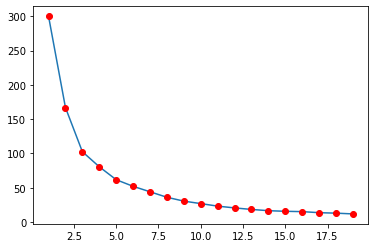

In [45]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [37]:
# судя по графику, нам нужно разбивать данные на два или три кластера
# разобьем на три (что соответствует количеству кластеров в исходных данных)

In [46]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_short_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

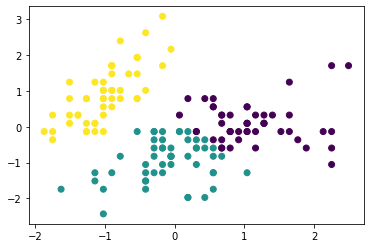

In [48]:
# визуализируем
plt.scatter(data_short_scaled[:, 0], data_short_scaled[:, 1], c=clusters)